In [9]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile
import root_numpy as rn
import numpy as np
import pandas as pd
import math
from matplotlib.colors import LogNorm
import matplotlib
from ROOT import larutil

%matplotlib inline
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'

SCE = larutil.SpaceChargeMicroBooNE()

In [10]:
tot_on = 525613
tot_off = 379202
tot_bnbcos = 101600

int_per_1e20POT = 99035.2 
dataPOT = 0.495 * (tot_on) / 547616  
mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 

off_to_on = 1.23 * (382718./tot_off) * (tot_on/547616.)
mc_to_onbeam = dataPOT/mcbnbcos_POT

print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on


MC to OnBeam :  0.463117341354
Off to OnBeam:  1.19152552442


In [11]:
#MC BNB + Cosmics 
fmcc8 ='CCpi0hist_dataMCComp_v6_meetingSuggestions.root'
a = rn.root2array(fmcc8,treename='tree')
df = pd.DataFrame(a)

df['calc_len'] = np.sqrt(pow(df.start_x - df.end_x,2) + pow(df.start_y - df.end_y,2) + \
                         pow(df.start_z - df.end_z,2) )
df['len_diff'] = df['len'] - df['calc_len']

# Add in distances to wall as well for easy fv study
df['dist_to_wall_x'] = np.where(256.35 - df.reco_vtx_x < df.reco_vtx_x, 256.35 - df.reco_vtx_x, df.reco_vtx_x) 
df['dist_to_wall_y'] = 116.5 - abs(df.reco_vtx_y)
df['dist_to_wall_z'] = np.where(1036.8 - df.reco_vtx_z < df.reco_vtx_z, 1036.8 - df.reco_vtx_z, df.reco_vtx_z) 

#sce_v = np.vectorize(SCE.GetPosOffsets)
#df['sce_mc_corr_z'] =  df['mc_vtx_z'] + sce_v(df['mc_vtx_x'],df['mc_vtx_y'],df['mc_vtx_z'])[2] 

In [13]:
df['sce_mc_corr_x'] = [ df['mc_vtx_x'][i] + 0.7 - SCE.GetPosOffsets(df['mc_vtx_x'][i],\
                        df['mc_vtx_y'][i],df['mc_vtx_z'][i])[0] for i in xrange(df['mc_vtx_x'].shape[0])]

df['sce_mc_corr_y'] = [ df['mc_vtx_y'][i] + SCE.GetPosOffsets(df['mc_vtx_x'][i],\
                        df['mc_vtx_y'][i],df['mc_vtx_z'][i])[1] for i in xrange(df['mc_vtx_x'].shape[0])]

df['sce_mc_corr_z'] = [ df['mc_vtx_z'][i] + SCE.GetPosOffsets(df['mc_vtx_x'][i],\
                        df['mc_vtx_y'][i],df['mc_vtx_z'][i])[2] for i in xrange(df['mc_vtx_x'].shape[0])]

df['true_vtx_diff'] = np.sqrt(pow(df['sce_mc_corr_x'] - df['reco_vtx_x'],2) + pow(df['sce_mc_corr_y'] - df['reco_vtx_y'],2)\
                            + pow(df['sce_mc_corr_z'] - df['reco_vtx_z'],2))

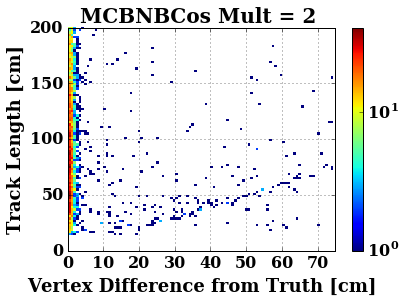

In [29]:
plt.figure()
_ = plt.hist2d(df_bnbcos_mult2.true_vtx_diff.values,df_bnbcos_mult2.len.values,bins=100,\
               range=[(0,75),(0,200)],norm=LogNorm())
plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))
plt.grid(True)
plt.ylabel('Track Length [cm]',fontsize=18,weight='bold')
plt.title('MCBNBCos Mult = 2 ',fontsize=20,weight='bold')
plt.xlabel('Vertex Difference from Truth [cm]',fontsize=18,weight='bold')
plt.colorbar()

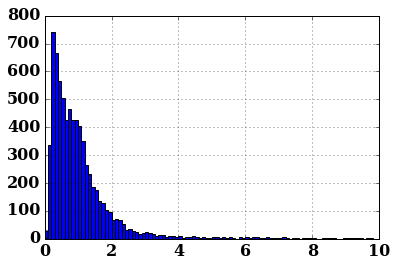

In [17]:
_,_,_ = plt.hist(df.true_vtx_diff,bins=100,range=(0,10))
plt.grid(True)
#_ = plt.hist2d(df.reco_vtx_y,df.true_vtx_diff,bins=100,range=[(-116,116),(0,500)])

In [18]:
df_beam_mult2 = df.query('mult == 2 and sample == 0')
df_offbeam_mult2 = df.query('mult == 2 and sample == 1')
df_bnbcos_mult2 = df.query('mult == 2 and sample == 2')
df_intime_mult2 = df.query('mult == 2 and sample == 3')

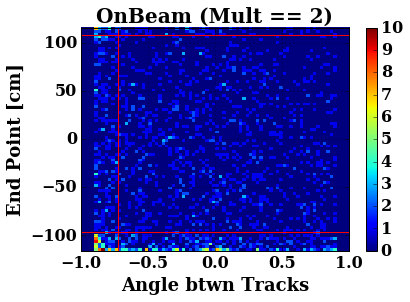

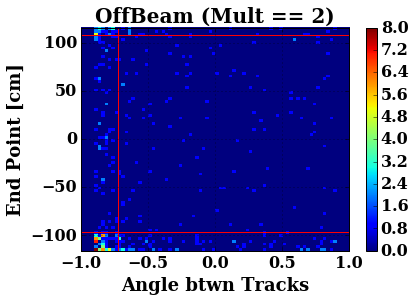

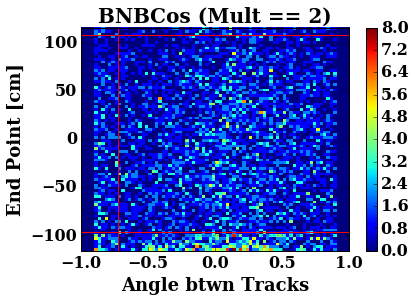

In [19]:
n= 80

plt.figure()
_ = plt.hist2d(df_beam_mult2.angleBtnTracks.values,df_beam_mult2.end_y.values,bins=n,\
               range=[(-1,1),(-116,116)])
plt.grid(True)
plt.title('OnBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(108,color='r',lw=1)
plt.axhline(-96,color='r',lw=1)
plt.axvline(-0.72,color='r',lw=1)

plt.figure()
_ = plt.hist2d(df_offbeam_mult2.angleBtnTracks.values,df_offbeam_mult2.end_y.values,bins=n,\
               range=[(-1,1),(-116,116)])
plt.grid(True)
plt.title('OffBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(108,color='r',lw=1)
plt.axhline(-96,color='r',lw=1)
plt.axvline(-0.72,color='r',lw=1)

plt.figure()
_ = plt.hist2d(df_bnbcos_mult2.angleBtnTracks.values,df_bnbcos_mult2.end_y.values,bins=n,\
               range=[(-1,1),(-116,116)])
plt.grid(True)
plt.title('BNBCos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(108,color='r',lw=1)
plt.axhline(-96,color='r',lw=1)
plt.axvline(-0.72,color='r',lw=1)


In [22]:
# Add in distances to wall as well for easy fv study
df_beam = df.query('sample == 0')
df_offbeam = df.query('sample == 1')
df_bnbcos = df.query('sample == 2')
df_intime = df.query('sample == 3')

df_beam_not = df.query('sample == 0 and mult != 2')
df_offbeam_not = df.query('sample == 1 and mult != 2')
df_bnbcos_not = df.query('sample == 2 and mult != 2')
df_intime_not = df.query('sample == 3 and mult != 2')

df_beam_2    = df.query('sample == 0 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
df_offbeam_2 = df.query('sample == 1 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
df_bnbcos_2 = df.query('sample == 2 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
df_intime_2 = df.query('sample == 3 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')

print df_offbeam.shape #query('mult > 1').shape
print df_offbeam_2.shape
df_beam_cat = pd.concat([df_beam_2,df_beam_not])
df_offbeam_cat = pd.concat([df_offbeam_2,df_offbeam_not])
df_bnbcos_cat = pd.concat([df_bnbcos_2,df_bnbcos_not])
df_intime_cat = pd.concat([df_intime_2,df_intime_not])

(982, 50)
(323, 50)


In [23]:

#print "SEL 2: "
#print " OnBeam: ", df_beam.shape[0]
#print " OffBeam: ", df_offbeam.shape[0]
#print " BNBCos: ", df_bnbcos.shape[0]
#print " InTime: ", df_intime.shape[0]

print "SEL 2 Scaled: "
print " OnBeam: ", df_beam.shape[0]
print " OffBeam: ", df_offbeam.shape[0] * off_to_on
print " On - OffBeam: ", df_beam.shape[0] - df_offbeam.shape[0] * off_to_on 
print " BNBCos: ", df_bnbcos.shape[0] * mc_to_onbeam
print " Difference : ", df_bnbcos.shape[0] * mc_to_onbeam - (df_beam.shape[0] - df_offbeam.shape[0] * off_to_on )
#print " InTime: ", df_intime.shape[0] * intime_to_onbeam


print "\nCut Adjusts Scaled: "
print " OnBeam: ", df_beam_cat.shape[0]
print " OffBeam: ",df_offbeam_cat.shape[0] * off_to_on
print " On - OffBeam: ", df_beam_cat.shape[0] - df_offbeam_cat.shape[0] * off_to_on
print " BNBCos: ",df_bnbcos_cat.shape[0] * mc_to_onbeam
print " Difference : ", df_bnbcos_cat.shape[0] * mc_to_onbeam - (df_beam_cat.shape[0] - df_offbeam_cat.shape[0] * off_to_on )
#print " InTime: ",df_intime_cat.shape[0] * intime_to_onbeam

SEL 2 Scaled: 
 OnBeam:  3883
 OffBeam:  1170.07806498
 On - OffBeam:  2712.92193502
 BNBCos:  4241.69172946
 Difference :  1528.76979445

Cut Adjusts Scaled: 
 OnBeam:  3662
 OffBeam:  983.008557649
 On - OffBeam:  2678.99144235
 BNBCos:  4187.97011787
 Difference :  1508.97867552


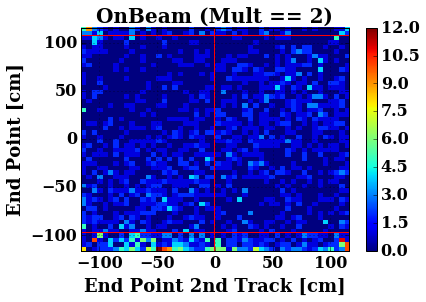

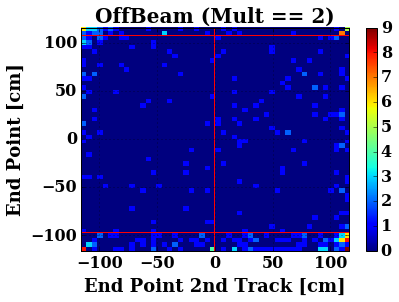

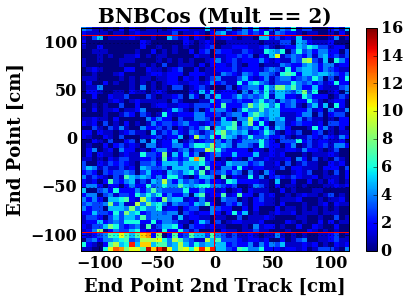

In [24]:
n= 50

plt.figure()
_ = plt.hist2d(df_beam_mult2.end_y_2nd.values,df_beam_mult2.end_y.values,bins=n,\
               range=[(-116,116),(-116,116)])
plt.grid(True)
plt.title('OnBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('End Point 2nd Track [cm]',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(108,color='r',lw=1)
plt.axhline(-96,color='r',lw=1)
plt.axvline(-0.72,color='r',lw=1)

plt.figure()
_ = plt.hist2d(df_offbeam_mult2.end_y_2nd.values,df_offbeam_mult2.end_y.values,bins=n,\
               range=[(-116,116),(-116,116)])
plt.grid(True)
plt.title('OffBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('End Point 2nd Track [cm]',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(108,color='r',lw=1)
plt.axhline(-96,color='r',lw=1)
plt.axvline(-0.72,color='r',lw=1)

plt.figure()
_ = plt.hist2d(df_bnbcos_mult2.end_y_2nd.values,df_bnbcos_mult2.end_y.values,bins=n,\
               range=[(-116,116),(-116,116)])
plt.grid(True)
plt.title('BNBCos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('End Point 2nd Track [cm]',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.colorbar()
plt.axhline(108,color='r',lw=1)
plt.axhline(-96,color='r',lw=1)
plt.axvline(-0.72,color='r',lw=1)

(0, 360)

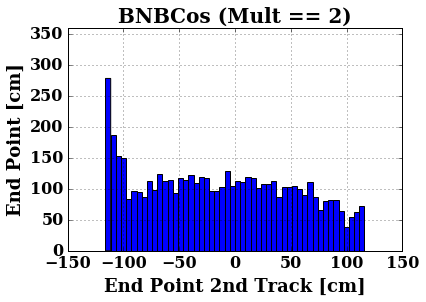

In [35]:
b = df_bnbcos.query('cosmic == 0 and mult == 2')

plt.figure()
_,_,_ = plt.hist(b.end_y.values,bins=n,\
               range=(-116,116))
plt.grid(True)
plt.title('BNBCos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('End Point 2nd Track [cm]',fontsize=18,weight='bold')
plt.ylabel('End Point [cm]',fontsize=18,weight='bold')
plt.ylim(0,360)


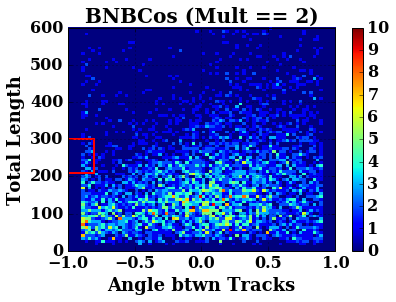

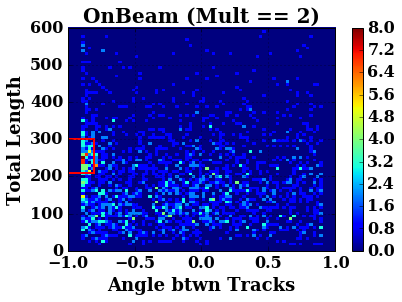

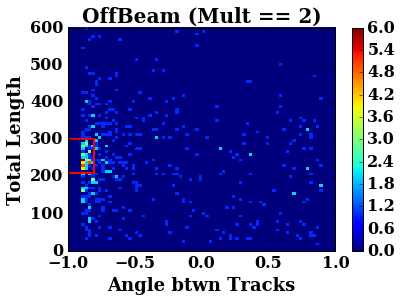

In [10]:
plt.figure()
_ = plt.hist2d(df_bnbcos_multgt1.angleBtnTracks.values,df_bnbcos_multgt1.tot_mult2_len.values,\
               bins=80,range=[(-1,1),(0,600)])
plt.grid(True)
plt.title('BNBCos (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('Total Length',fontsize=18,weight='bold')
plt.colorbar()
plt.plot((-0.8,-0.8),(210,300),color='r',lw=2)
plt.plot((-1.,-0.8),(210,210),color='r',lw=2)
plt.plot((-1.,-0.8),(300,300),color='r',lw=2)

plt.figure()
_ = plt.hist2d(df_beam_multgt1.angleBtnTracks.values,df_beam_multgt1.tot_mult2_len.values,bins=80,\
               range=[(-1,1),(0,600)])#,norm=LogNorm())
plt.grid(True)
plt.title('OnBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('Total Length',fontsize=18,weight='bold')
plt.colorbar()
plt.plot((-0.8,-0.8),(210,300),color='r',lw=2)
plt.plot((-1.,-0.8),(210,210),color='r',lw=2)
plt.plot((-1.,-0.8),(300,300),color='r',lw=2)

plt.figure()
_ = plt.hist2d(df_offbeam_multgt1.angleBtnTracks.values,df_offbeam_multgt1.tot_mult2_len.values,bins=80,\
               range=[(-1,1),(0,600)])#,norm=LogNorm())
plt.grid(True)
plt.title('OffBeam (Mult == 2)',fontsize=20,weight='bold')
plt.xlabel('Angle btwn Tracks',fontsize=18,weight='bold')
plt.ylabel('Total Length',fontsize=18,weight='bold')
plt.colorbar()
plt.plot((-0.8,-0.8),(210,300),color='r',lw=2)
plt.plot((-1.,-0.8),(210,210),color='r',lw=2)
plt.plot((-1.,-0.8),(300,300),color='r',lw=2)

In [13]:
# Add in distances to wall as well for easy fv study
df_beam = df_cos.query('sample == 0')
df_offbeam = df_cos.query('sample == 1')
df_bnbcos = df_cos.query('sample == 2')
df_intime = df_cos.query('sample == 3')

print df_beam.shape[0],df_offbeam.shape[0], df_bnbcos.shape[0]
#print b.shape[0],ob.shape[0],bc.shape[0]

df_beam_not = df_cos.query('sample == 0 and mult != 2')
df_offbeam_not = df_cos.query('sample == 1 and mult != 2')
df_bnbcos_not = df_cos.query('sample == 2 and mult != 2')
df_intime_not = df_cos.query('sample == 3 and mult != 2')

df_beam_2    = df_cos.query('sample == 0 and mult == 2 and \
                            (angleBtnTracks > -0.8 or (tot_mult2_len < 210 and tot_mult2_len >300))')
df_offbeam_2 = df_cos.query('sample == 1 and mult == 2 and \
                            (angleBtnTracks > -0.8 or (tot_mult2_len < 210 and tot_mult2_len >300))')
df_bnbcos_2 = df_cos.query('sample == 2 and mult == 2 and \
                          (angleBtnTracks > -0.8 or (tot_mult2_len < 210 and tot_mult2_len >300))')
df_intime_2 = df_cos.query('sample == 3 and mult == 2 and \
                          (angleBtnTracks > -0.8 or (tot_mult2_len < 210 and tot_mult2_len >300))')

df_beam_cat = pd.concat([df_beam_2,df_beam_not])
df_offbeam_cat = pd.concat([df_offbeam_2,df_offbeam_not])
df_bnbcos_cat = pd.concat([df_bnbcos_2,df_bnbcos_not])
df_intime_cat = pd.concat([df_intime_2,df_intime_not])

 3883 982 9159


In [14]:
print "SEL 2: "
print " OnBeam: ", df_beam.shape[0]
print " OffBeam: ", df_offbeam.shape[0]
print " BNBCos: ", df_bnbcos.shape[0]
print " InTime: ", df_intime.shape[0]

print "SEL 2 Scaled: "
print " OnBeam: %.0f"% df_beam.shape[0]
print " OffBeam: %.2f"% (df_offbeam.shape[0] * off_to_on)
print " On - OffBeam: %.2f" % (df_beam.shape[0] - df_offbeam.shape[0] * off_to_on)
print " BNBCos: %.2f"% (df_bnbcos.shape[0] * mc_to_onbeam)
#print " InTime: %.2f"% (df_intime.shape[0] * intime_to_onbeam)


print "\nCut Adjusts Scaled: "
print " OnBeam: ", df_beam_cat.shape[0]
print " OffBeam: ",df_offbeam_cat.shape[0] * off_to_on
print " On - OffBeam: ", df_beam_cat.shape[0] - df_offbeam_cat.shape[0] * off_to_on
print " BNBCos: ",df_bnbcos_cat.shape[0] * mc_to_onbeam
#print " InTime: ",df_intime_cat.shape[0] * intime_to_onbeam


SEL 2: 
 OnBeam:  3883
 OffBeam:  982
 BNBCos:  9159
 InTime:  146
SEL 2 Scaled: 
 OnBeam: 3883
 OffBeam: 1170.08
 On - OffBeam: 2712.92
 BNBCos: 4241.69

Cut Adjusts Scaled: 
 OnBeam:  3562
 OffBeam:  968.710251355
 On - OffBeam:  2593.28974864
 BNBCos:  4080.99001201


In [15]:
b = df_beam_multgt1.query('(angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
ob = df_offbeam_multgt1.query('(angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
bc = df_bnbcos_multgt1.query('(angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')

In [16]:
# Add in distances to wall as well for easy fv study
df_beam = df_cos.query('sample == 0')
df_offbeam = df_cos.query('sample == 1')
df_bnbcos = df_cos.query('sample == 2')
df_intime = df_cos.query('sample == 3')

print df_beam.shape[0],df_offbeam.shape[0], df_bnbcos.shape[0]
print b.shape[0],ob.shape[0],bc.shape[0]

df_beam_not = df_cos.query('sample == 0 and mult != 2')
df_offbeam_not = df_cos.query('sample == 1 and mult != 2')
df_bnbcos_not = df_cos.query('sample == 2 and mult != 2')
df_intime_not = df_cos.query('sample == 3 and mult != 2')

df_beam_2    = df_cos.query('sample == 0 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
df_offbeam_2 = df_cos.query('sample == 1 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
df_bnbcos_2 = df_cos.query('sample == 2 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')
df_intime_2 = df_cos.query('sample == 3 and mult == 2 and (angleBtnTracks > -0.72 or end_y < 108) and \
                          (angleBtnTracks > -0.65 or end_y > -96 )')

df_beam_cat = pd.concat([df_beam_2,df_beam_not])
df_offbeam_cat = pd.concat([df_offbeam_2,df_offbeam_not])
df_bnbcos_cat = pd.concat([df_bnbcos_2,df_bnbcos_not])
df_intime_cat = pd.concat([df_intime_2,df_intime_not])

3883 982 9159
1877 323 5497


In [17]:

#print "SEL 2: "
#print " OnBeam: ", df_beam.shape[0]
#print " OffBeam: ", df_offbeam.shape[0]
#print " BNBCos: ", df_bnbcos.shape[0]
#print " InTime: ", df_intime.shape[0]

print "SEL 2 Scaled: "
print " OnBeam: ", df_beam.shape[0]
print " OffBeam: ", df_offbeam.shape[0] * off_to_on
print " On - OffBeam: ", df_beam.shape[0] - df_offbeam.shape[0] * off_to_on 
print " BNBCos: ", df_bnbcos.shape[0] * mc_to_onbeam
#print " InTime: ", df_intime.shape[0] * intime_to_onbeam


print "\nCut Adjusts Scaled: "
print " OnBeam: ", df_beam_cat.shape[0]
print " OffBeam: ",df_offbeam_cat.shape[0] * off_to_on
print " On - OffBeam: ", df_beam_cat.shape[0] - df_offbeam_cat.shape[0] * off_to_on
print " BNBCos: ",df_bnbcos_cat.shape[0] * mc_to_onbeam
#print " InTime: ",df_intime_cat.shape[0] * intime_to_onbeam


SEL 2 Scaled: 
 OnBeam:  3883
 OffBeam:  1170.07806498
 On - OffBeam:  2712.92193502
 BNBCos:  4241.69172946

Cut Adjusts Scaled: 
 OnBeam:  3662
 OffBeam:  983.008557649
 On - OffBeam:  2678.99144235
 BNBCos:  4187.97011787


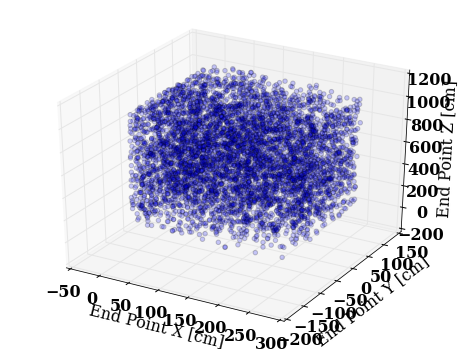

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_bnbcos_multgt1.end_x.values,df_bnbcos_multgt1.end_y.values,\
            df_bnbcos_multgt1.end_z.values,'k.',alpha=0.2)
ax.set_xlabel('End Point X [cm]')
ax.set_ylabel('End Point Y [cm]')
ax.set_zlabel('End Point Z [cm]')

